# Cancer detection using CNN

In [0]:
! pip install tensorflow-gpu==2.2.0-rc0

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
cancer = datasets.load_breast_cancer()

In [0]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)  # features in X it should have 30 columns

In [0]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y = cancer.target

In [0]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
# here 0 and 1 is either cancer is malignant or benign  .. we can see this by following command
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
X.shape

(569, 30)

*# 569 values and 30 columns*

In [0]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 , stratify = y)

# here testsize is ofc how much data for testing 
# stratify is how much data is distribute symmetrically in train and test 

By printing the shape we can see how 20% of data is taken into testing

In [0]:
X_train.shape

(455, 30)

In [0]:
X_test.shape

(114, 30)

As we know our data is 2 dim... but a NN requires a 3 dim.. data we reshape it

But as the data is pandas df .. we must convert it into numpy array and then reshape it

In [0]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train = X_train.reshape(455, 30, 1)  # reshaping the data
X_test = X_test.reshape(114, 30, 1)

# Building CNN

In [0]:
epochs = 50

In [0]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30,1))) # its 1st layer its necessary to provide inputshape
model.add(BatchNormalization()) # reduces shift variance in data while it passes from layer to layer
model.add(Dropout(0.2))    # dropping 20 % neurons
 
model.add(Conv1D(filters=64, kernel_size=2, activation='relu')) # Hidden layer
model.add(BatchNormalization()) # reduces shift variance in data while it passes from layer to layer
model.add(Dropout(0.5))     # dropping 50 % neurons

model.add(Flatten()) # 2d data into vector
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))  # output layer.. units=1 here as predicting only 1-op
                                                # ie malignant or benign


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [0]:
# compiling 
model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])
                                              # binary cross entropy as 2 outputs only either 0 / 1

In [0]:
history = model.fit(X_train, y_train, epochs=epochs,validation_data=(X_test, y_test),verbose=1)

Epoch 1/50
15/15 [==============================] - 0s 20ms/step - loss: 1.0530 - accuracy: 0.5714 - val_loss: 0.6864 - val_accuracy: 0.6053
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.7385 - accuracy: 0.6857 - val_loss: 0.6450 - val_accuracy: 0.8070
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6874 - accuracy: 0.7451 - val_loss: 0.6053 - val_accuracy: 0.8684
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4497 - accuracy: 0.7934 - val_loss: 0.5711 - val_accuracy: 0.8947
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4052 - accuracy: 0.8286 - val_loss: 0.5398 - val_accuracy: 0.8947
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3600 - accuracy: 0.8549 - val_loss: 0.5102 - val_accuracy: 0.8947
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.2930 - accuracy: 0.8637 - val_loss: 0.4817 - val_accuracy: 0.8947
Epoch 8/50
15/15 [=

In [0]:
history.history

{'accuracy': [0.5714285969734192,
  0.6857143044471741,
  0.7450549602508545,
  0.79340660572052,
  0.8285714387893677,
  0.8549450635910034,
  0.8637362718582153,
  0.8813186883926392,
  0.8835164904594421,
  0.89670330286026,
  0.9186813235282898,
  0.892307698726654,
  0.9054945111274719,
  0.901098906993866,
  0.9252747297286987,
  0.9120879173278809,
  0.9340659379959106,
  0.9142857193946838,
  0.9142857193946838,
  0.9252747297286987,
  0.9406593441963196,
  0.9384615421295166,
  0.9450549483299255,
  0.9362637400627136,
  0.9384615421295166,
  0.9428571462631226,
  0.9538461565971375,
  0.9428571462631226,
  0.9538461565971375,
  0.9626373648643494,
  0.9692307710647583,
  0.9450549483299255,
  0.9362637400627136,
  0.9516483545303345,
  0.9450549483299255,
  0.9516483545303345,
  0.9494505524635315,
  0.9538461565971375,
  0.9472527503967285,
  0.9648351669311523,
  0.9472527503967285,
  0.9362637400627136,
  0.9472527503967285,
  0.9340659379959106,
  0.9538461565971375,
  0.

In [0]:
# now we plot the curve 
def plot_learningcurve(history,epochs):
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy',color = 'white')
  plt.ylabel('Accuracy',color = 'white')
  plt.xlabel('Epoch',color = 'white')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

  print('* *'*50)
  #plot training and validation ( loss values )
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss',color = 'white')
  plt.ylabel('Loss',color = 'white')
  plt.xlabel('Epoch',color = 'white')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

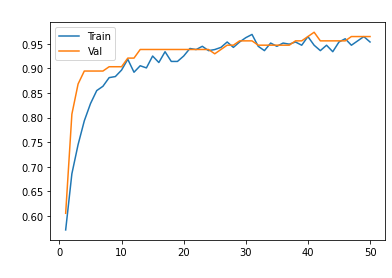

* ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** *


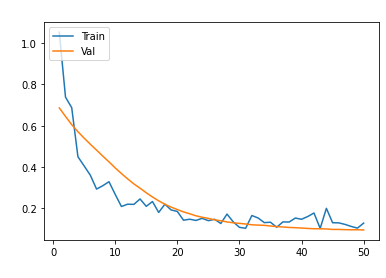

In [0]:
plot_learningcurve(history,epochs)

In [0]:
y_pred = model.predict_classes(X_test,verbose=1)

4/4 [==============================] - 0s 2ms/step


In [0]:
y_pred

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
mat = confusion_matrix(y_test,y_pred)

In [0]:
mat

array([[40,  2],
       [ 2, 70]])

In [0]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score

In [0]:
accuracy_score(y_test,y_pred)

0.9649122807017544

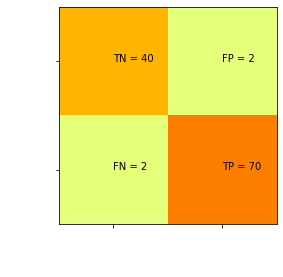

In [0]:
plt.imshow(mat, interpolation='nearest', cmap=plt.cm.Wistia)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(mat[i][j]))
classNames = ['Negative','Positive']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45,c='white')
plt.yticks(tick_marks, classNames , c='white')
plt.show()